<a href="https://colab.research.google.com/github/Shin-Sangseok/Google_colab_practice/blob/main/basketball_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:

# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

# 디렉토리 및 파일 이름에 맞추어 변경
#font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
# font_location = './NanumGothic.ttf'
#font_name = fm.FontProperties(fname=font_location).get_name()
#rc('font', family=font_name)

In [92]:
#train, test
#train = pd.read_csv('https://raw.githubsercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv')
#test = pd.read_csv('https://raw.githubsercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv')

In [93]:
df = pd.read_csv('/content/drive/MyDrive/python-data/basketball_stat.csv', encoding = 'utf-8')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


Text(0.5, 1.0, 'STL and 2P')

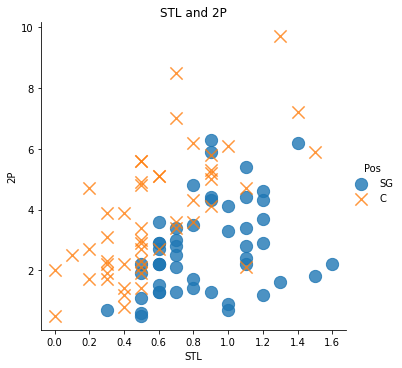

In [94]:
sns.lmplot('STL', '2P', data = df, fit_reg = False, 
                scatter_kws = {'s': 150}, 
                markers = ['o','x'], 
                hue = 'Pos'
)
plt.title('STL and 2P')

Text(0.5, 1.0, 'AST and SP')

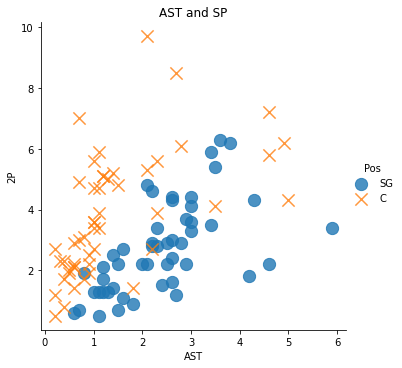

In [95]:
sns.lmplot('AST', '2P', data = df, fit_reg = False,
              scatter_kws = {'s': 150}, 
              markers = ['o','x'], 
           hue = 'Pos'
      )
plt.title('AST and SP')

Text(0.5, 1.0, '3P and BLK')

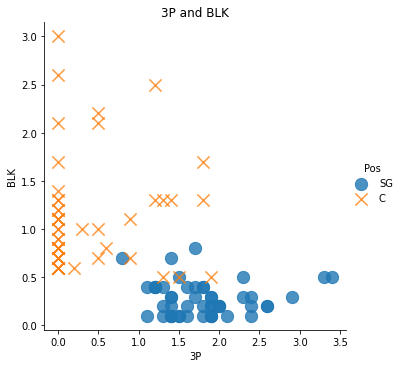

In [96]:
sns.lmplot('3P','BLK', data = df, fit_reg = False, 
           scatter_kws = {'s': 150}, 
           markers = ['o','x'], 
           hue = 'Pos'
  )
plt.title('3P and BLK')

Text(0.5, 1.0, '3P and TRB')

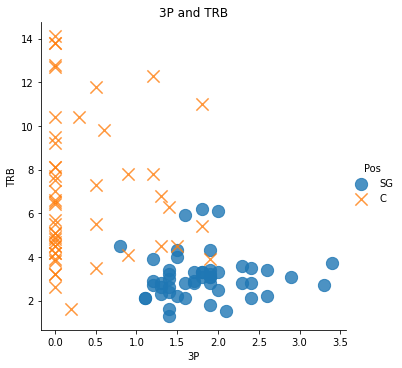

In [97]:
sns.lmplot('3P', 'TRB', data = df, fit_reg = False, 
              scatter_kws = {'s': 150}, 
              markers = ['o','x'], 
              hue = 'Pos' 
          )
plt.title('3P and TRB')

In [98]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [99]:
df.drop(['2P', 'AST', 'STL'], axis = 1, inplace =True)

In [100]:
df.columns

Index(['Player', 'Pos', '3P', 'TRB', 'BLK'], dtype='object')

In [101]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [102]:
X_train, X_test, y_train, y_test = train_test_split(
                                df.iloc[:,2:], 
                                df.iloc[:,1], 
                                test_size = 0.2, 
                                random_state = 42 


)

In [103]:
#모델 선정=>cross-validation(교차 검증)
#knn, svm, decision tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [104]:
model_list = [] 
knn = KNeighborsClassifier()
svm = SVC() 
dt = DecisionTreeClassifier()
model_list = [knn, svm, dt] 


In [105]:
model_list 

[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [106]:
def print_cv(model, train, test, k):
   scores = cross_val_score(model, train, test, cv = k) 
   print('----------교차 검증(cv) 리스트 결과-------------', scores) #avg나 mean이나 비슷하다 
   mean_scores = np.mean(scores)
   print('----------교차 검증(cv) 평균 결과----------', mean_scores)
   return scores, mean_scores 
   
   ##함수의 결과로 여러 개의 데이터를 return 할 수 있다. 
   ##튜플로 묶어서 반환하게 된다.(scores, mean_scores)
   

In [107]:
 #cv_result = print_cv() ##cv_result는 tuple이 저장  (scores, mean_scores)
 #index_0 = cv_result[0]
 #index_1 = cv_result[1]

In [108]:
#index_0, index_1 = print_cv() 

In [109]:
#k = 5 , 전체 몇 번을 교차검증을 하게 될까요? 
#model_n : 3, k_n = 5, total_n : 15  

In [110]:
model_names = ["KNeighborsClassifier","SVC","DecisionTreeClassifier"] 
sc_list = [] 
mean_sc_list = [] 
for model in model_list: 
  sc, mean_sc = print_cv(model, X_train, y_train, 5)
  sc_list.append(sc)
  mean_sc_list.append(mean_sc)

print('******************************************************')
print('-------------전체 모델의 교차 검증 이름 리스트 -----')
print(model_names)
print('-------------전체 모델의 교차 검증 결과 리스트 -----')
print(sc_list)
print('-------------전체 모델의 교차 검증 결과  평균 -----')
print(mean_sc_list)

----------교차 검증(cv) 리스트 결과------------- [0.9375 0.8125 0.8125 0.875  1.    ]
----------교차 검증(cv) 평균 결과---------- 0.8875
----------교차 검증(cv) 리스트 결과------------- [0.875  0.875  0.8125 0.9375 1.    ]
----------교차 검증(cv) 평균 결과---------- 0.9
----------교차 검증(cv) 리스트 결과------------- [0.9375 1.     0.875  0.9375 1.    ]
----------교차 검증(cv) 평균 결과---------- 0.95
******************************************************
-------------전체 모델의 교차 검증 이름 리스트 -----
['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier']
-------------전체 모델의 교차 검증 결과 리스트 -----
[array([0.9375, 0.8125, 0.8125, 0.875 , 1.    ]), array([0.875 , 0.875 , 0.8125, 0.9375, 1.    ]), array([0.9375, 1.    , 0.875 , 0.9375, 1.    ])]
-------------전체 모델의 교차 검증 결과  평균 -----
[0.8875, 0.9, 0.95]


In [111]:
##교차검증 결과 Decision Tree를 사용해서 Test해보기로 결정 

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.8875 , 0.89375, 0.9    , 0.90625, 0.9125 , 0.91875, 0.925  ,
        0.93125, 0.9375 , 0.94375, 0.95   ]),
 <a list of 10 Patch objects>)

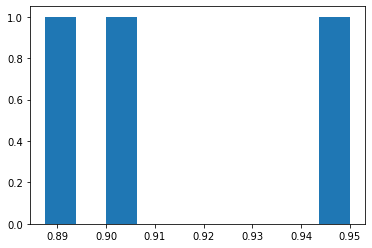

In [112]:
#시각화해서 비교해보자 
plt.hist(mean_sc_list)


In [113]:
#하이퍼 파라메터 => grid search 

[** DecisionTreeClassifier**]

<img src = "https://raw.githubusercontent.com/aliciawill/python-data/25c2ec82e609b64febcf4fa7e78c66f89f3db15e/data12/dt_params2.png" width = "400" height="400">

In [114]:
def grid_search(model, params, k):
 gs_model =  GridSearchCV(model, params, cv=k)
 gs_model.fit(X_train, y_train) 
 print(gs_model.best_estimator_) #최적의 파라미터가 적용된 모델 객체 
 print(gs_model.best_score_) #최적의 파라미터가 적용된 모델로 학습한 정확도 결과 
 print(gs_model.best_params_)#그리드 서치를 통해 찾은 최적의 파라미터 
 print(gs_model) #grid_search 객체 

In [115]:
params = { #하이퍼파라미터 설정으로 받을 수 있는 모든 경우의 수 =>여기서는 4*3*2 = 24
    'max_depth': [3,5,7,10], #key:하이퍼파라미터명, values는 list타입이어야 함. 
    'random_state': [1,3,5], 
    'criterion':['gini','entropy'] #혼란스러운 정도(분류의 정도)를 계산하는 기준 
}

In [116]:
#함수의 모든 파라미터를 보고 싶으면 함수명 쓰고 shift + tab  
grid_search(dt, params, 5) #grid_search의 모든 경우의 수는 24 *5 

DecisionTreeClassifier(max_depth=3, random_state=1)
0.95
{'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})


In [117]:
#그리드 서치를 통해서 찾은 
#최적의 파라미터는 {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}

In [119]:
#최적의 하이퍼 파라미터 모델 객체 생성
#fit() 
dt_gs = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 1)
dt_gs.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [138]:
##테스트 데이터로 검증해보자 
def test_validation(model, X_test, y_test):
  predict_result = model.predict(X_test)
  acc = accuracy_score(y_test, predict_result)
  print('accuracy>>', acc)
  cf = confusion_matrix(y_test, predict_result)
  print("confusion_matrix >>\n", cf)
  ## confusion matrix는 binary classification인 경우에는 보기가 괜찮으나, 
  ## multi class classification인 경우에는 보기가 힘들다. 이럴 때는 classification_report를 사용 
  c_report  = classification_report(y_test, predict_result)
  print('confusion matrix>>\n', c_report)

In [139]:
y_test.value_counts()

C     10
SG    10
Name: Pos, dtype: int64

In [140]:
test_validation(dt_gs, X_test, y_test)

accuracy>> 0.95
confusion_matrix >>
 [[10  0]
 [ 1  9]]
confusion matrix>>
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [141]:
#실제 C인데 예측(c, sg), 실제(sg)--> 예측(sg, c),
#이진분류(binary classification)인 경우 
#예측할 수 있는 경우의 수는 4가지
#4가지를 표 형태로 정리해주는 것이 confusion_matrix 
#첫 번째 행/열은 C, 두번째 행/열은 SG, abc순으로 행/열이 결정 
#c는 10개를 다 맞춤. sg는 9개를 맞추고 한 개를 c로 예측(틀림)
#acc = 10+9/10+9+1